<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M5_NB_MiniProject_1_Movielens_Cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Movielens data querying and analysis using NoSQL Database

## Problem Statement

Using the Cassandra NoSQL database, explore the **Movielens** dataset and build a movie recommendation engine

## Learning Objectives

At the end of the mini-project, you will be able to :

* understand the concepts of NoSQL platforms
* implement the database connectivity using Cassandra
* create and insert data to the database
* perform querying, retrieving and analyzing the data from database

### Dataset

The dataset chosen for this mini-project is [Movielens Dataset](https://movielens.org/). The dataset describes movies and ratings from Movielens. It contains movies from year 1919 to 2000 of total 3883 movies. There are 6040 users who have rated one or more than one movie of total 1000209 ratings collected. Movielens is maintained by members of GroupLens Research at the University of Minnesota. There are 3 datasets given, and they are:

1. `data_movie.csv` that contains movies information:

* MovieId
* Title
* Genres

2. `data_rating.csv` that contains ratings of movies by users:

* UserId
* MovieId
* Rating

3. `data_users.csv` that contains users information:

* UserId
* Age
* Gender

## Information

#### NoSQL platforms

A NoSQL database provides a mechanism for storage and retrieval of data that is modeled in a form other than the tabular relations used in relational databases.

**Cassandra**

Apache Cassandra is a free and open-source, distributed, wide-column store, NoSQL database management system designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure. It is a NOSQL database developed by Facebook. It is a great database that allows you to effectively run queries on large amount of structured and semi structured data.

To know when you have to choose Cassandra as your database of choice, you need to have an understanding of CAP Theorem.

CAP theorem states that it is impossible for a distributed system to satisfy all three of these guarantees together, you need to leave one out.

- C is Consistency, means all nodes have the same data at the same time
- P is partition tolerance, means that in case of failure the system continues to operate
- A is availability , make sure every request receives a response

![img](https://developer.ibm.com/developer/default/tutorials/ba-set-up-apache-cassandra-architecture/images/figure1.png)

### Components of Cassandra

There are following components in the Cassandra

![img](https://www.guru99.com/images/cassandra/021116_0524_CassandraAr1.png)

**Node**
Node is the place where data is stored. It is the basic component of Cassandra.

**Data Center**
A collection of nodes are called data center. Many nodes are categorized as a data center.

**Cluster**
The cluster is the collection of many data centers.

**Commit Log**
Every write operation is written to Commit Log. Commit log is used for crash recovery.

**Mem-table**
After data written in Commit log, data is written in Mem-table. Data is written in Mem-table temporarily.

**SSTable**
When Mem-table reaches a certain threshold, data is flushed to an SSTable disk file.

### Data Replication

As hardware problem can occur or link can be down at any time during data process, a solution is required to provide a backup when the problem has occurred. So data is replicated for assuring no single point of failure.

Cassandra places replicas of data on different nodes based on these two factors.
- Where to place next replica is determined by the Replication Strategy.
- While the total number of replicas placed on different nodes is determined by the Replication Factor.

One Replication factor means that there is only a single copy of data while three replication factor means that there are three copies of the data on three different nodes.

## Grading = 10 Points

**Install the cassandra-driver**

In [5]:
!pip install cassandra-driver

#### Importing Necessary Packages

In [6]:
import pandas as pd
import cassandra
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from matplotlib import pyplot as plt

In [7]:
print(cassandra.__version__)

3.28.0


### Database connection (2 points)

**Astra Datastax login:** Please refer to this [document](https://cdn.iisc.talentsprint.com/CDS/DB_Connect_Docs/Datastax_Connect.pdf) for account creation on DataStax

**Connect the database and create keyspace:**

* Download Secure Connect Bundle zip file from Datastax [connect](https://docs.datastax.com/en/astra/docs/obtaining-database-credentials.html) section. Follow the instructions on the page
* Upload the `Secure-connect-XXXX.zip` file, which is downloaded from datastax.
* Generate the token and save the credentials from settings section.
    - Hint: Select role as `admin-user` and generate token
* Using the credentials generated in settings, specify the `client Id` and `Client Secret` to the variables below.

In [8]:
from google.colab import files
files.upload()

Saving secure-connect-cds.zip to secure-connect-cds.zip


{'secure-connect-cds.zip': b'PK\x03\x04\x14\x00\x08\x00\x08\x00\xa8\x83\xf5V\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\t\x00ca.crtUT\x05\x00\x01]\xb2\xbadd\x94\xcd\x92\xba8\x14\xc5\xf7<\xc5\xec\xad)\x01?\x90\xc5\x7fq\x03!\x80\x06\r\xf2\x15w\x82\x1a\xc4\x06\x15i\x02>\xfdT\xdb\x9b\xa9\x99,O\xa5~\xf7\x9c\xba\xb7\xce\xdf?\x0fa\xe2\x05\x7fY8\x8c<\xc7\xb3 \xc2\x1fU\xa1\x9egw\xb6e\xc1c\x14 =\x04\xc2\xb3P\x13K\x9bq\x7f}?xe_\x04\xc0\xf0\x061\x90\xe77\xdeP\xb8\x11\xd0b\x8cJj%\t\x1d\x14\xeb\r>\x12A\x82@Dp\x0b\x10\r\x99\xc4\x82\xdb\tc.\x96]\xc4\xd3\x85\xca\xf7\xc8\xce\x893\xf2\x08\x87\x14V\x1f\x80UR/$\x8e\xaa\xf0$Py&\x06\xbb\x02\xfa\x0bzE(\x0e^\xf9,\xb9\xd1=\x97>|`6\x1e\xb4\x8a\xef\x177~]\x94\xc5,\x1c\xf9^\x93Em\xde\x94M\x1d\x96\'\xe2\xbcO\xc4\x99o\xea\xa0\xcf#8;R\x1di\x04\x03\xad`\xa46\xd6\xa9\xed\x1f\x1d\xa9\xbe\xff\xabQ\xf7\xf5\xef\x08<\x82\xaf$\xa2\xec%-\xf6\x99\xeaa\xe9\xdb,\xc21E\xdeo\xee\x81nb\xdd\xf9>\x11,\x98>\x94E\x8d\x07\x05G\xb0\xfb\x05\xdc#\x0b\x7f\xdcD?n(\x9bK\xfb\xd7\x

set the `Secure connect bundle zip file` path and specify the `clientID` and `Client_Secret`

In [9]:
# Enter the credentials below
zip_path = '/content/secure-connect-cds.zip'
Client_ID = 'lDRQdQkyfcrdkHyDpOxrZoqh'
Client_Secret = 'yYeWqIZtrfFQCjhHmXO5QYHnbWSb2njqh9Tu2ZloSIiQBSwl3rEZc1l4w.Mr1jBKL.C1HaYFFDNAYBlK6,tmD72WQeWTyyxgC2UBF1ugZwoc3v9NxD+SnYPMD-XO.Nl9'

#### Create a Cluster instance to connect to your Astra database.

You will typically have one instance of Cluster for each Cassandra cluster you want to interact with. Create a session object using the cluster.

**Hint:** Refer Python documentation under Connect.

In [10]:
cloud_config= {
        'secure_connect_bundle': zip_path
}
auth_provider = PlainTextAuthProvider(Client_ID,
                                      Client_Secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider, protocol_version=4)
session = cluster.connect()

#### Verifying the database connection

execute a simple query and verify the database connection

In [11]:
# Execute a simple query
query = "SELECT * FROM your_table_name"
#result = session.execute(query)

result = session.execute("select release_version from system.local").one()

# Verify the database connection
if result:
    print("Database connection successful.")
else:
    print("Database connection failed.")

Database connection successful.


#### Setting the Key Space

A keyspace is the top-level database object that controls the replication for the object it contains at each datacenter in the cluster. Keyspaces contain tables, materialized views and user-defined types, functions and aggregates. Typically, a cluster has one keyspace per application. Since replication is controlled on a per-keyspace basis, store data with different replication requirements (at the same datacenter) in different keyspaces.

Before creating tables and inserting data let's create and set the keyspace

* we can create keyspace manually on Datastax dashboard or also using the CQL command. (use lowercase to avoid errors)

    * [Hint](https://docs.datastax.com/en/cql-oss/3.x/cql/cql_reference/cqlCreateKeyspace.html)

* once the keyspace is created successfully, set the keyspace using the command `set_keyspace()`

In [12]:
# Setting the keyspace
keyspace_name = 'movielens'
try:
    session.set_keyspace(keyspace_name)
    print("Keyspace '{}' set successfully.".format(keyspace_name))
except Exception as e:
    print("Error setting keyspace: {}".format(str(e)))

Keyspace 'movielens' set successfully.


### Insert the data into Database (1 point)

To insert the data into database, we can create a table in keyspace and insert the data by using CQL command or we can directly upload the data on the datstax dashboard using [Astra Dataloader](https://docs.datastax.com/en/astra/docs/develop/dev-upload-data.html)

As there is huge amount of data, insertion of data using CQL commands may take time, preferable method is Astra Dataloader.

* Download the below mentioned 3 datasets and upload to Datastax Astra dashboard using Astra Dataloader
    * [data_movies](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_movies.csv)
    * [data_ratings](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_ratings.csv)
    * [data_users](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_users.csv)
    
while uploading data using Datastax Astra dataloader you may encounter the below error message due to formatting issues or bulk data. In that case, click on upload button for second time for data upload.
![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_upload_error.JPG)

Note: Cassandra also handles non-SQL data formats such as JSON (see [insert JSON data](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useInsertJSON.html)). However for the purpose of this Mini-project, we are using a tabular data format (.csv).

### Querying the database (2 points)

* Select First 10 rows of the data_movies table
* How many Users have watched the movie  `'Contact (1997)'` with MovieId = 1584
* Select the count of teenage male users

**Note:** For syntax related issues, try the **CQLConsole** on Datastax dashboard

**Hint:** [CQL command for select](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useQueryColumnsSort.html)

**Select First 10 rows of the data_movies table**

In [13]:
# Execute the query to select the first 10 rows
query = "SELECT * FROM data_movies LIMIT 10"
try:
    result = session.execute(query)
    for row in result:
        print(row)
except Exception as e:
    print("Error executing query: {}".format(str(e)))

Row(movieid=3372, genres='Action|War', title='Bridge at Remagen, The (1969)')
Row(movieid=1584, genres='Drama|Sci-Fi', title='Contact (1997)')
Row(movieid=2731, genres='Drama', title='400 Blows, The (Les Quatre cents coups) (1959)')
Row(movieid=2713, genres='Horror|Thriller', title='Lake Placid (1999)')
Row(movieid=769, genres='Documentary', title='Marlene Dietrich: Shadow and Light (1996)')
Row(movieid=1863, genres='Comedy', title='Major League: Back to the Minors (1998)')
Row(movieid=2453, genres='Drama|Fantasy', title='Boy Who Could Fly, The (1986)')
Row(movieid=2302, genres='Comedy', title='My Cousin Vinny (1992)')
Row(movieid=3733, genres='Drama', title='Paper Chase, The (1973)')
Row(movieid=1765, genres='Crime|Drama', title='Letter From Death Row, A (1998)')


**How many Users have watched the movie 'Contact (1997)' with MovieId = 1584**

In [14]:
# Executing the query to count the no. of occurrences of users who watched the movie
data_ratings_query = "SELECT COUNT(*) FROM data_ratings WHERE \"movieid\" = 1584 ALLOW FILTERING"
try:
    result = session.execute(data_ratings_query)
    count = result[0][0]
    print("Number of occurrences of users who watched 'Contact (1997)' with MovieId = 1584: ", count)
    for row in result:
        print("row:",row)
except Exception as e:
    print("Error executing query: {}".format(str(e)))



Number of occurrences of users who watched 'Contact (1997)' with MovieId = 1584:  20
row: Row(count=20)


<ipython-input-14-757bb599ba7b>:5: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  count = result[0][0]


In [15]:
result[0][0]

<ipython-input-15-460da444203f>:1: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  result[0][0]


20

**Select the count of teenage male users**

In [17]:
# Execute the query to count the number of teenage male users
data_users_query = "SELECT COUNT(*) FROM data_users WHERE age >= 13 AND age <= 19 AND gender = 'M' ALLOW FILTERING"
try:
    result = session.execute(data_users_query)
    count = result[0][0]
    print("Count of teenage male users: ", count)
except Exception as e:
    print("Error executing query: {}".format(str(e)))

Count of teenage male users:  805


<ipython-input-17-bf5ec5dcef4e>:5: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  count = result[0][0]


* Select the count of movies with Top rating from the entire ratings table

In [19]:
query = "select count(*) from movielens.data_ratings where rating=5 allow filtering;"
try:
    top_rated_count = session.execute(query)
    for c in top_rated_count:
        print(c)
except Exception as e:
    print(e)

Row(count=5155)


In [20]:
import pandas as pd

# Assuming 'data_ratings' is a pandas DataFrame containing the 'rating' column
# Load your 'data_ratings' DataFrame here. For example:
data_ratings = pd.read_csv('data_ratings.csv')  # Replace 'data_ratings.csv' with your actual data file.

# Find the maximum rating in the DataFrame
max_rating = data_ratings['rating'].max()

# Filter the DataFrame to get only the rows with the top rating
top_rated_movies = data_ratings[data_ratings['rating'] == max_rating]

# Get the count of movies with the top rating
top_rated_movies_count = len(top_rated_movies)

print("Count of movies with the top rating:", top_rated_movies_count)

Count of movies with the top rating: 226310


In [22]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

# Enter the credentials below
zip_path = '/content/secure-connect-cds.zip'
Client_ID = 'lDRQdQkyfcrdkHyDpOxrZoqh'
Client_Secret = 'yYeWqIZtrfFQCjhHmXO5QYHnbWSb2njqh9Tu2ZloSIiQBSwl3rEZc1l4w.Mr1jBKL.C1HaYFFDNAYBlK6,tmD72WQeWTyyxgC2UBF1ugZwoc3v9NxD+SnYPMD-XO.Nl9'

cloud_config = {
    'secure_connect_bundle': zip_path
}

auth_provider = PlainTextAuthProvider(Client_ID, Client_Secret)
cluster = Cluster(
    cloud=cloud_config,
    auth_provider=auth_provider,
    protocol_version=4,  # Specify the protocol version to use (required for setting the request timeout)
    connect_timeout=1500.0,  # Increase the connection timeout value as per your requirement
    control_connection_timeout=None,  # Disable control connection timeout
)
session = cluster.connect()

# Set the keyspace
keyspace_name = 'movielens'
session.set_keyspace(keyspace_name)

# Execute the query to count the movies with the top rating
query = "SELECT COUNT(*) FROM data_ratings WHERE rating = 5 ALLOW FILTERING"
try:
    result = session.execute(query)
    count = result[0][0]
    print("Count of movies with the top rating: ", count)
except Exception as e:
    print("Error executing query: {}".format(str(e)))


Count of movies with the top rating:  7627


<ipython-input-22-6528089c05a0>:31: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  count = result[0][0]


* Select the count of movies, ONLY in Comedy genre from the entire movies table

In [23]:
# Execute the query to count the movies in the "Comedy" genre
query = "SELECT COUNT(*) FROM data_movies WHERE genres={} ALLOW FILTERING;".format("'Comedy'")
try:
    result = session.execute(query)
    count = result[0][0]
    print("Count of movies in the 'Comedy' genre: ", count)
except Exception as e:
    print("Error executing query: {}".format(str(e)))

Count of movies in the 'Comedy' genre:  521


<ipython-input-23-2ee432573304>:5: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  count = result[0][0]


### Visualizing the Data (2 points)

Retrieve the data using CQL queries and visualize using matplotlib

* Visualize the frequencies of movie genres from the entire data

In [24]:
# Execute the query to retrieve the genre frequencies
query = "SELECT genres FROM data_movies"
try:
    result = session.execute(query)
    genre_freq = {}

    for row in result:
        genres = row.genres.split('|')
        for genre in genres:
            genre_freq[genre] = genre_freq.get(genre, 0) + 1

except Exception as e:
    print("Error executing query: {}".format(str(e)))

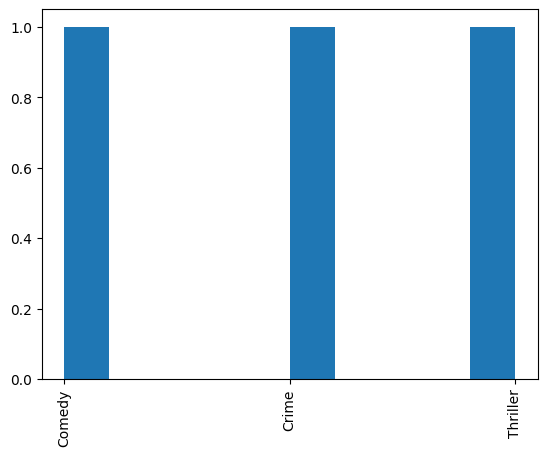

In [25]:
plt.hist(genres);
plt.xticks(rotation=90)
plt.show()

* Visualize the bar plot showing no.of movies released in a particular year

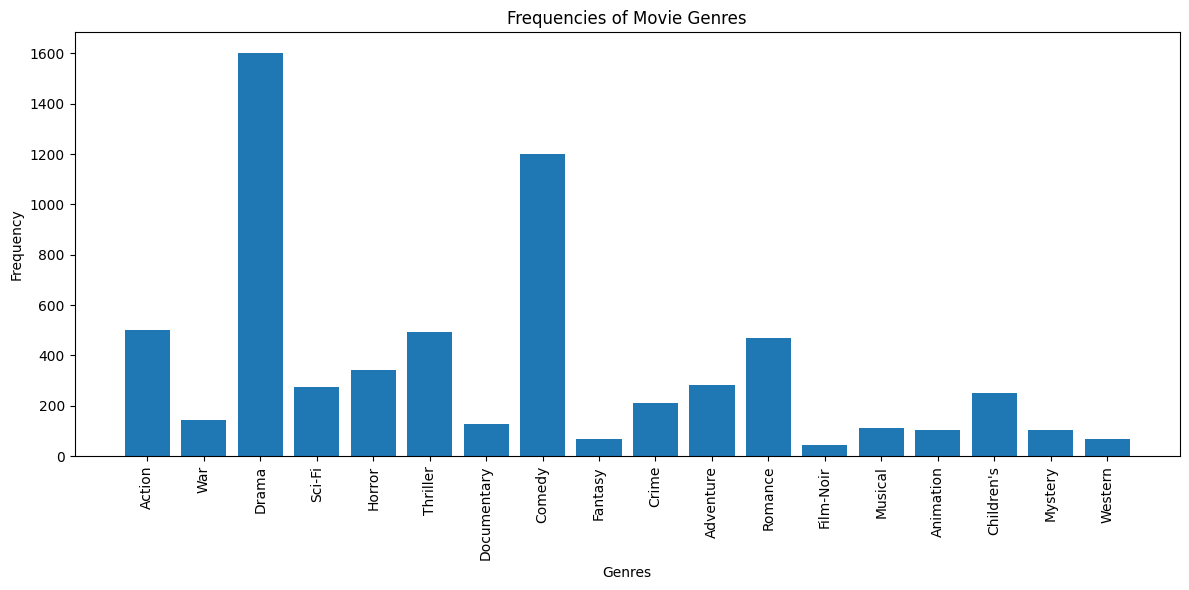

In [26]:
# Plot the genre frequencies
genres = list(genre_freq.keys())
frequencies = list(genre_freq.values())

plt.figure(figsize=(12, 6))
plt.bar(genres, frequencies)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequencies of Movie Genres')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

year_of_release:
 [1969, 1997, 1959, 1999, 1996, 1998, 1986, 1992, 1973, 1998, 1997, 1998, 1985, 1987, 1995, 1995, 1996, 1992, 1986, 1996, 1996, 1993, 1975, 1994, 1997, 1944, 1960, 1947, 1973, 1965, 1995, 1995, 1994, 1974, 1993, 1993, 1997, 1995, 1995, 1951, 1993, 1996, 1998, 1996, 1974, 1979, 1993, 1995, 1982, 1996, 1998, 1999, 1994, 1974, 1997, 1939, 1978, 1994, 1994, 1973, 1995, 1952, 1999, 1998, 1984, 1998, 1960, 1999, 1998, 1998, 1983, 1997, 1996, 1990, 1987, 1989, 1991, 1927, 1994, 1982, 1999, 2000, 1999, 1995, 1998, 1986, 1988, 1991, 1956, 1998, 1993, 1993, 1999, 1953, 1999, 1996, 2000, 1996, 1983, 1996, 1991, 1998, 1996, 1981, 1991, 1990, 1985, 1997, 1996, 1957, 1998, 1994, 1971, 1995, 1959, 1997, 1998, 1997, 1995, 1944, 1999, 1995, 1960, 1998, 1998, 1998, 1995, 1993, 1949, 1997, 1957, 1962, 1993, 1986, 1990, 1925, 1996, 1994, 1996, 1998, 1919, 1994, 1983, 1998, 1998, 1993, 1953, 1998, 1982, 1984, 2000, 1995, 1999, 1955, 1977, 1992, 1993, 2000, 1997, 1999, 1998, 1932, 2000, 199

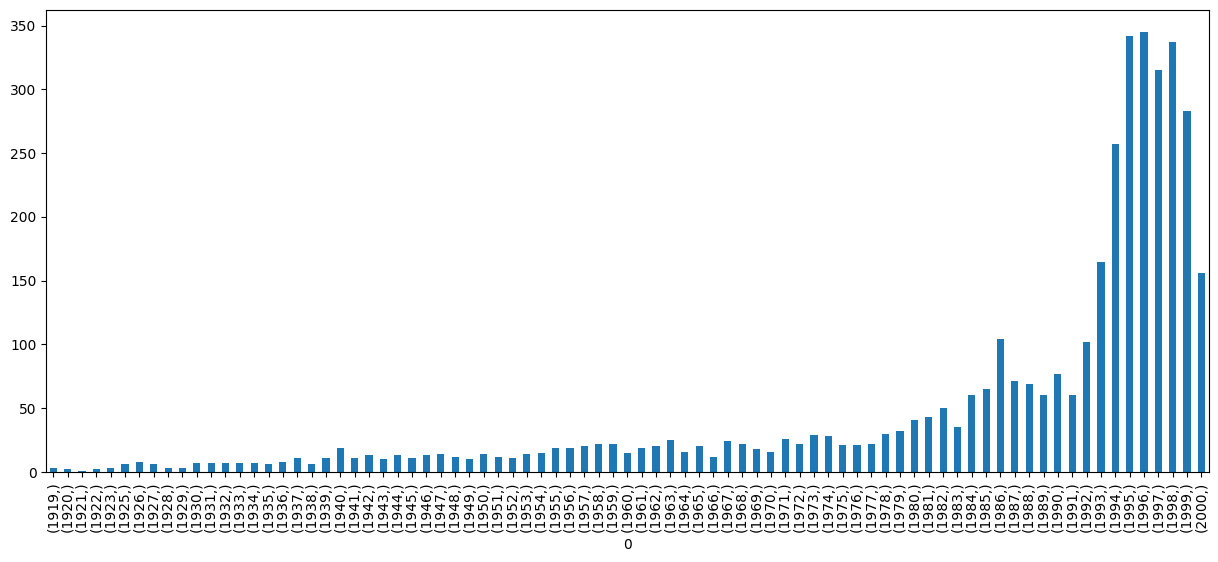

In [27]:
query = "SELECT * from movielens.data_movies"
year_of_release = []
year_of_no_release = []
try:
    rows_data_movies = session.execute(query)
    for row in rows_data_movies:
        # print(row)
        if row.title.find("("):
            year_of_release.append(int(row.title[-5:-1]))
        else:
            year_of_no_release.append(row.title)
except Exception as e:
    print(e)

print("year_of_release:\n", year_of_release)

Year_Of_Release = sorted(year_of_release)
plt.figure(figsize=(15, 6))
pd.DataFrame(Year_Of_Release).value_counts(sort=False).plot.bar()

plt.xticks(rotation=90)
plt.show()

**Pandas Route**

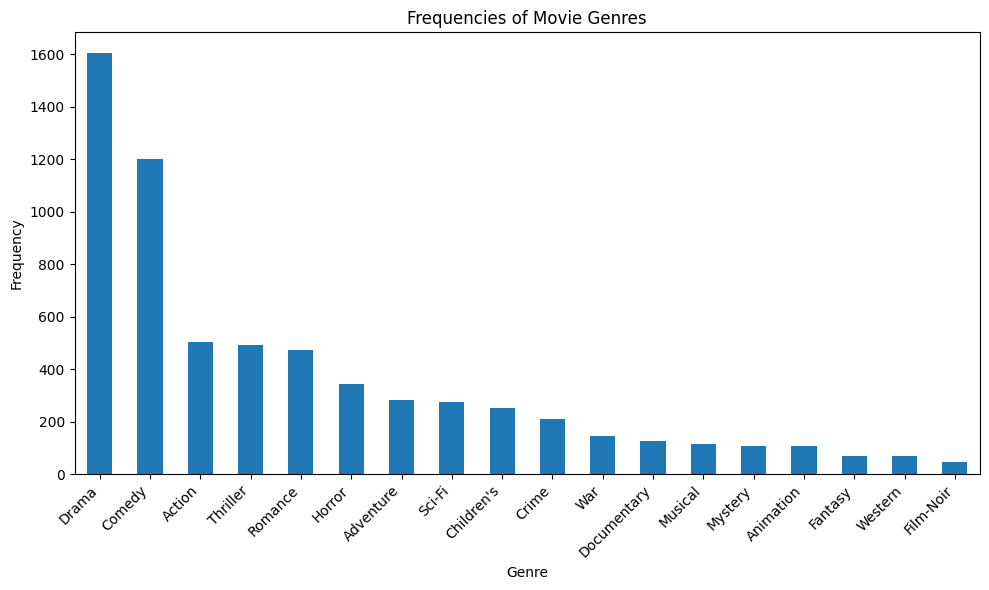

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
data_movies = pd.read_csv("/content/data_movies.csv")
# Assuming 'data_movies' is the pandas DataFrame containing the movie data
# Split the genres string and create a list of all genres
all_genres = [genre.split('|') for genre in data_movies['genres']]
# Flatten the list of lists to get all individual genres
all_genres = [genre for sublist in all_genres for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the frequencies using a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequencies of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* Depict the plot of Age groups ratio who are active in watching movies

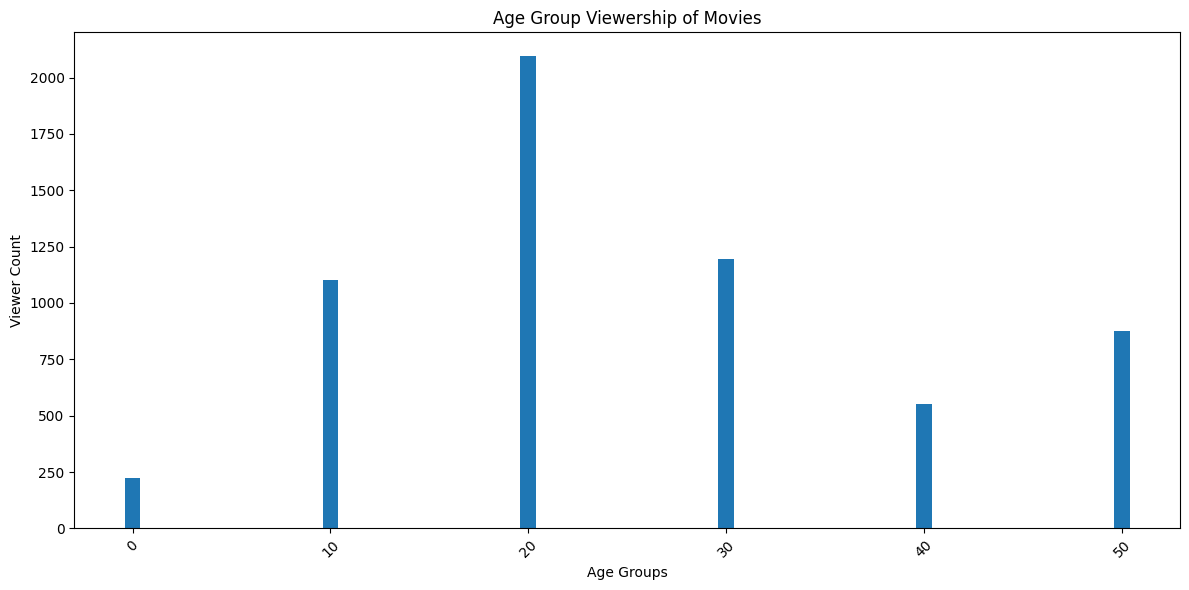

In [29]:
# Execute the query to retrieve the age group viewership
query = "SELECT age FROM movielens.data_users"
try:
    result = session.execute(query)
    age_group_count = {}

    for row in result:
        age_group = row.age // 10 * 10  # Grouping ages into groups of 10 (e.g., 10-19, 20-29, etc.)
        age_group_count[age_group] = age_group_count.get(age_group, 0) + 1

    # Plot the age group viewership
    age_groups = list(age_group_count.keys())
    viewership = list(age_group_count.values())

    plt.figure(figsize=(12, 6))
    plt.bar(age_groups, viewership)
    plt.xlabel('Age Groups')
    plt.ylabel('Viewer Count')
    plt.title('Age Group Viewership of Movies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error executing query: {}".format(str(e)))

### Analyzing the Data (3 points)

Analyzing the correlation between the movies records, implement a function to recommend movies based on search term

* Retrieve all the data from ratings table

In [31]:
# Execute the query to retrieve all data from the 'data_ratings' table
query = "SELECT * FROM data_ratings"
ratings_array = []
try:
    result = session.execute(query)
    for row in result:
        # Process each row of data as needed
        print(row)
        ratings_array.append(row)

except Exception as e:
    print("Error executing query: {}".format(str(e)))

Streaming output truncated to the last 5000 lines.
Row(userid=659, movieid=151, rating=5)
Row(userid=2054, movieid=1833, rating=3)
Row(userid=3599, movieid=1356, rating=5)
Row(userid=133, movieid=2407, rating=3)
Row(userid=3571, movieid=2987, rating=5)
Row(userid=5886, movieid=1231, rating=3)
Row(userid=5227, movieid=1544, rating=5)
Row(userid=169, movieid=3475, rating=4)
Row(userid=4126, movieid=1320, rating=4)
Row(userid=2537, movieid=111, rating=4)
Row(userid=3490, movieid=318, rating=4)
Row(userid=5426, movieid=589, rating=4)
Row(userid=5301, movieid=1246, rating=3)
Row(userid=214, movieid=2060, rating=4)
Row(userid=2015, movieid=609, rating=1)
Row(userid=2962, movieid=2002, rating=4)
Row(userid=1579, movieid=288, rating=3)
Row(userid=4860, movieid=1127, rating=3)
Row(userid=2131, movieid=3665, rating=2)
Row(userid=2860, movieid=1965, rating=4)
Row(userid=1010, movieid=3394, rating=1)
Row(userid=2837, movieid=1885, rating=3)
Row(userid=5728, movieid=2918, rating=3)
Row(userid=3888,

In [32]:
ratings_array
df_ratings = pd.DataFrame(ratings_array)
df_ratings.head()

,userid,movieid,rating
0,1119,2929,4
1,2918,480,3
2,5589,3536,5
3,4277,3181,3
4,4708,2916,3


* Create a movie matrix by applying pivot table with the above retrieved ratings data

* use `pd.pivot_table` with index = `userid`, columns = `movieid` and Values = `rating`

 **Hint:** create a dataframe with above retrieved ratings data to apply pivot table

In [33]:
# Executing the query to retrieve all data from the 'data_ratings' table
query = "SELECT * FROM movielens.data_ratings"
try:
    # Creating a movie matrix using pivot table
    movie_matrix = pd.pivot_table(df_ratings, values='rating', index='userid', columns='movieid')

    # Print the movie matrix
    print("movie_matrix:\n", movie_matrix)
except Exception as e:
    print("Error executing query: {}".format(str(e)))

movie_matrix:
 movieid  1     2     3     4     5     6     7     8     9     10    ...  \
userid                                                               ...   
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6037      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6038      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6039      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6040      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ... 

In [34]:
# Execute the query to retrieve all data from the 'data_ratings' table
query = "SELECT * FROM movielens.data_ratings"
try:
    result = session.execute(query)

    # Create a DataFrame from the query result
    df_ratings = pd.DataFrame(result.all())

    # Create a movie matrix using pivot table
    movie_matrix = pd.pivot_table(df_ratings, values='rating', index='userid', columns='movieid')

    # Print the movie matrix
    print("movie_matrix:\n", movie_matrix)

except Exception as e:
    print("Error executing query: {}".format(str(e)))

movie_matrix:
 movieid  1     2     3     4     5     6     7     8     9     10    ...  \
userid                                                               ...   
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6037      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6038      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6039      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6040      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ... 

In [35]:
movie_matrix_df = pd.DataFrame(movie_matrix)
print("movie_matrix_df Dimension:", movie_matrix_df.shape)
movie_matrix_df.head()

movie_matrix_df Dimension: (5704, 3154)


movieid,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Define a function named `recommend_movies()` which will take a movieid as argument and return the top 5 similar movieid's

    * Considering the argument (movieid) as search item collect the particular row data
    
    * Using movie matrix calculate correlation between movie search Item data and all the remaining data
    
        * Hint: [corr_with()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html)
        
    * Sort the result by ascending order and return the top 5 items

In [36]:
# Function to recommend similar movies based on movieid
def recommend_movies(movieid):
    # Calculate the correlation between the specified movie and all other movies
    correlations = movie_matrix.corrwith(movie_matrix[movieid])

    # Remove NaN values and sort correlations in descending order
    correlations = correlations.dropna().sort_values(ascending=False) # correlations: [1 x 3432]

    # Get the top 5 similar movieids
    top_similar_movies = correlations.head(5)

    return top_similar_movies

In [37]:
# Example usage
movieid = '1225'
movieid = int(movieid)
top_similar_movies = recommend_movies(movieid)
print("Top 5 similar movies for movieid {}: ".format(movieid))
print(top_similar_movies)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Top 5 similar movies for movieid 1225: 
movieid
2087    1.0
1941    1.0
3471    1.0
1225    1.0
1367    1.0
dtype: float64


In [38]:
# Function to retrieve row data for a given movieid
def get_movie_data(movieid):
    movie_data = movie_matrix.loc[:, movieid]
    return movie_data

In [39]:
movie_data = get_movie_data(movieid)
print("Data for movieid {}: ".format(movieid))
print(movie_data)

Data for movieid 1225: 
userid
1       NaN
2       5.0
3       NaN
4       NaN
5       NaN
       ... 
6036    NaN
6037    NaN
6038    NaN
6039    NaN
6040    3.0
Name: 1225, Length: 5704, dtype: float64


In [40]:
# Function to calculate correlation between a movie search item and all other movies
def calculate_correlation(movieid):
    movie_data = get_movie_data(movieid)
    correlation = movie_matrix.corrwith(movie_data)
    return correlation

In [41]:
correlation = calculate_correlation(movieid)
print("Correlation with movieid {}: ".format(movieid))
print(correlation)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation with movieid 1225: 
movieid
1       0.0
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
3948    NaN
3949    NaN
3950    NaN
3951    NaN
3952    NaN
Length: 3154, dtype: float64


In [42]:
# Execute the query to retrieve all data from the 'data_ratings' table
query = "SELECT * FROM data_ratings"
try:
    result = session.execute(query)

    # Create a DataFrame from the query result
    df_ratings = pd.DataFrame(result.all())

    # Create a movie matrix using pivot table
    movie_matrix = pd.pivot_table(df_ratings, values='rating', index='userid', columns='movieid')

    # Function to recommend similar movies based on movieid
    def recommend_movies(movieid):
        # Calculate the correlation between the specified movie and all other movies
        correlations = movie_matrix.corrwith(movie_matrix[movieid])

        # Remove NaN values and sort correlations in descending order
        correlations = correlations.dropna().sort_values(ascending=False)

        # Get the top 5 similar movieids
        top_similar_movies = correlations.head(5)

        return top_similar_movies

    # Function to retrieve row data for a given movieid
    def get_movie_data(movieid):
        movie_data = movie_matrix.loc[:, movieid]
        return movie_data

    # Function to calculate correlation between a movie search item and all other movies
    def calculate_correlation(movieid):
        movie_data = get_movie_data(movieid)
        correlation = movie_matrix.corrwith(movie_data)
        return correlation

    #def calculate_correlation(movieid):
        # movie_data = get_movie_data(movieid)
        # correlation = movie_matrix.corrwith(movie_data, axis=1).to_frame(name="Correlation").reset_index()
        # correlation = correlation.set_index("movieid")
        # return correlation

    # Function to plot heatmap with annotations for correlation
    def plot_heatmap_with_annotations(correlation):
        import seaborn as sns
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.xlabel("Movie ID")
        plt.ylabel("Movie ID")
        plt.show()

    # Example usage
    movieid = '1584'
    movieid = int(movieid)
    top_similar_movies = recommend_movies(movieid)
    print("Top 5 similar movies for movieid {}: ".format(movieid))
    print(top_similar_movies)

    movie_data = get_movie_data(movieid)
    print("Data for movieid {}: ".format(movieid))
    print(movie_data)

    correlation = calculate_correlation(movieid)
    print("Correlation with movieid {}: ".format(movieid))
    print(correlation)

    plot_heatmap_with_annotations(correlation)

except Exception as e:
    print("Error executing query: {}".format(str(e)))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Top 5 similar movies for movieid 1584: 
movieid
926     1.0
2112    1.0
2033    1.0
1616    1.0
551     1.0
dtype: float64
Data for movieid 1584: 
userid
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
6036   NaN
6037   NaN
6038   NaN
6039   NaN
6040   NaN
Name: 1584, Length: 5875, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation with movieid 1584: 
movieid
1       0.000000
2       0.265165
3            NaN
4            NaN
5            NaN
          ...   
3948   -1.000000
3949         NaN
3950         NaN
3951         NaN
3952         NaN
Length: 3264, dtype: float64
Error executing query: Inconsistent shape between the condition and the input (got (3264, 1) and (3264,))


<Figure size 1200x800 with 0 Axes>

In [43]:
movieid = '1584'
movieid = int(movieid)
correlation = movie_matrix.corrwith(movie_data, axis=1).to_frame(name="Correlation").reset_index()
#correlation = correlation.set_index('1584')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-pac

* write a query to get MovieId of a Title (your choice) and the result MovieId as a search item by calling the above defined function

In [44]:
# YOUR CODE HERE
# Execute the query to retrieve the MovieId of the desired title
# query = "SELECT movieid FROM data_movies WHERE title = 'Talented Mr. Ripley, The (1999)'"
query = 'SELECT * FROM movielens.data_movies WHERE title={} ALLOW FILTERING'.format("'Talented Mr. Ripley, The (1999)'")
print(query)
try:
    result = session.execute(query)
    #for row_i in result:
        #print("Movie ID:",row_i.movieid)
    # Extract the MovieId from the query result
    movie_id = result[0].movieid
    print("Movie ID:", movie_id)
except Exception as e:
    print(e)



SELECT * FROM movielens.data_movies WHERE title='Talented Mr. Ripley, The (1999)' ALLOW FILTERING
Movie ID: 3176


<ipython-input-44-ab72ddd48e8f>:11: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  movie_id = result[0].movieid


In [45]:
# Calling the recommend_movies function with the obtained MovieId
recommended_movies = recommend_movies(movie_id)
print(recommended_movies)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movieid
2505    1.0
3671    1.0
153     1.0
3635    1.0
2841    1.0
dtype: float64


In [46]:
recommended_similar_movies = recommend_movies(3176)
print(recommended_similar_movies)
print("recommended_similar_movie IDs:\n", recommended_similar_movies.index[0:])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movieid
2505    1.0
3671    1.0
153     1.0
3635    1.0
2841    1.0
dtype: float64
recommended_similar_movie IDs:
 Int64Index([2505, 3671, 153, 3635, 2841], dtype='int64', name='movieid')


* Now taking the result of top 5 items (MovieId's) write a query to retrieve the Movie title from movies table

In [48]:
# Retrieve the top 5 MovieIds from the recommend_movies function
top_movie_ids = recommended_movies.index.tolist()

# Create a comma-separated string of MovieIds for the query
for movie_id in top_movie_ids:
    # Execute the query to retrieve the movie titles for the top 5 MovieIds
    # query = f"SELECT Title FROM data_movies WHERE MovieId IN ({movie_ids_str})"
    query = 'SELECT * FROM data_movies WHERE movieid= {} ALLOW FILTERING'.format(movie_id)
    try:
        results = session.execute(query)
        for row_i in results:
          print(row_i.title, row_i.genres)
    except Exception as e:
        print(e)


8MM (1999) Thriller
Blazing Saddles (1974) Comedy|Western
Batman Forever (1995) Action|Adventure|Comedy|Crime
Spy Who Loved Me, The (1977) Action
Stir of Echoes (1999) Thriller


**Closing the Session and Cluster**

In [49]:
session.shutdown()
cluster.shutdown()

**some key features and concepts of Cassandra:**

**Introduction:** Cassandra is a highly scalable and distributed NoSQL database system designed to handle large amounts of data across multiple commodity servers, providing high availability and fault tolerance. It was originally developed by Facebook and is now maintained by the Apache Software Foundation.

1. Distributed Architecture: Cassandra uses a peer-to-peer distributed system architecture, where data is distributed across multiple nodes in a cluster. This allows for easy scalability by adding or removing nodes without affecting the overall system.

2. No Single Point of Failure: Cassandra is designed to be fault-tolerant, with no single point of failure. Each data item is replicated across multiple nodes, ensuring high availability even in the event of node failures.

3. Performance: Cassandra is optimized for high write and read throughput, making it suitable for use cases that require low-latency data access. It uses a log-structured storage engine and supports asynchronous writes and multi-threaded data access.

4. Data Model: Cassandra follows a distributed key-value data model. It provides a flexible schema with support for column families (similar to tables) and columns within them. It also supports wide rows and denormalized data structures, allowing for efficient data retrieval.

5. Query Language: Cassandra Query Language (CQL) is a SQL-like language used to interact with Cassandra. It provides a familiar syntax for creating tables, inserting data, querying data, and modifying schema definitions.

6. Tunable Consistency: Cassandra allows users to configure the consistency level for read and write operations. Consistency can be adjusted to trade off between performance and data consistency guarantees based on application requirements.

7. Tunable Data Replication: Cassandra provides the ability to configure the replication factor, allowing users to control the number of copies of data stored across the cluster. This enables data distribution and fault tolerance.

8. Support for Clustering and Replication Strategies: Cassandra supports various strategies for data distribution and replication, including simple strategy, network topology strategy, and more. These strategies determine how data is distributed across nodes and replicated for fault tolerance.

9. Built-in Caching: Cassandra has built-in support for caching frequently accessed data, improving read performance. It offers multiple levels of caching, including row cache and key cache.

10. Integration with Ecosystem: Cassandra integrates with various tools and frameworks in the big data ecosystem, such as Apache Spark, Apache Hadoop, and Apache Kafka. This allows for seamless data processing and analytics workflows.